In [31]:
import pandas as pd
import numpy as np

In [32]:
dis_sym_df = pd.read_csv('disease_symptoms.csv')
sym_wgh_df = pd.read_csv('Symptom-severity.csv')

In [33]:
def clean_word(string):
	s=string.lower().split(' ')
	s = [x for x in s if x != '']
	return ' '.join(s)

In [34]:
dis_sym_df['Disease'] = dis_sym_df['Disease'].apply(clean_word)

In [35]:
dis_sym_df['list_of_symptoms'] = dis_sym_df.agg(list,axis=1)

In [36]:
def remove_nan(lst):
	i=0
	while((len(lst) != i) and (lst[i] is not np.nan)):
		i+=1;

	return lst[:i]

In [37]:
def clean_list(lst):
	for i in range(len(lst)):
		lst[i] = clean_word(lst[i])
	return lst

In [38]:
dis_sym_df['list_of_symptoms'] = dis_sym_df['list_of_symptoms'].apply(remove_nan)
dis_sym_df['list_of_symptoms'] = dis_sym_df['list_of_symptoms'].apply(clean_list)
dis_sym_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,list_of_symptoms
0,fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[fungal infection, itching, skin_rash, nodal_s..."
1,fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[fungal infection, skin_rash, nodal_skin_erupt..."
2,fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[fungal infection, itching, nodal_skin_eruptio..."
3,fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[fungal infection, itching, skin_rash, dischro..."
4,fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[fungal infection, itching, skin_rash, nodal_s..."


In [39]:
sym_wgh_df['Symptom'] = sym_wgh_df['Symptom'].apply(clean_word)
sym_wgh_df['Symptom'].drop_duplicates(inplace=True)
sym_wgh_df.set_index('Symptom',inplace=True)
sym_wgh_df.head()

,weight
Symptom,
itching,1
skin_rash,3
nodal_skin_eruptions,4
continuous_sneezing,4
shivering,5


In [40]:
symptoms = sym_wgh_df.index.unique()

In [41]:
symptoms_df = pd.DataFrame(columns=symptoms,index=dis_sym_df.index)

In [42]:
symptoms_df['list_of_symptoms'] = dis_sym_df['list_of_symptoms']

In [43]:
func = lambda x: sym_wgh_df.loc[symp,'weight'] if symp in x['list_of_symptoms'] else 0
for symp in symptoms:
    symptoms_df[symp] = symptoms_df.apply(func,axis=1)


In [44]:
symptoms_df.drop('list_of_symptoms',axis=1,inplace=True)

In [45]:
symptoms_df['Disease'] = dis_sym_df['Disease']

In [46]:
symptoms_df.head(10)

Symptom,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Disease
0,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
1,0,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
2,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
3,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
4,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
5,0,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
6,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
7,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
8,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
9,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection


In [61]:
labels=symptoms_df['Disease'].values
data = symptoms_df.iloc[:,:-1]
data.drop('fluid_overload',axis=1,inplace=True)

In [62]:
data.to_csv("symptoms-weight.csv")

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

In [59]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size=0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)

x_test


(4182, 131) (738, 131) (4182,) (738,)


Symptom,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
3109,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3076,0,0,0,4,5,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4361,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2321,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,0,0,0,0,0,0,0,5,3,4,...,0,0,0,0,0,0,0,0,0,0
3567,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2058,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
f1 = f1_score(y_test, preds, average='macro') * 100
acu = accuracy_score(y_test, preds)*100
print('F1-score% = ',f1)
print('Accuracy% = ',acu )


F1-score% =  100.0
Accuracy% =  100.0


<AxesSubplot:>

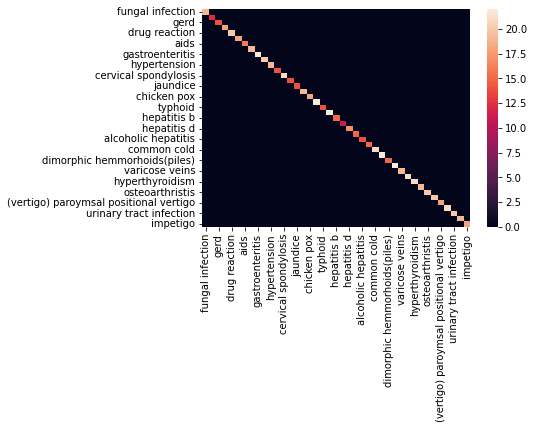

In [52]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(
    conf_mat, index=dis_sym_df['Disease'].unique(), columns=dis_sym_df['Disease'].unique())
sns.heatmap(df_cm)


In [53]:
import pickle

with open('model.pkl','wb') as file:
	pickle.dump(model,file)